In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [83]:
df = pd.read_csv('netfilx.csv', encoding='latin-1')

In [84]:
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [85]:
df = df.drop_duplicates() 
df.duplicated().values.any()

False

In [86]:
df.drop(df.index[df['release year'] == 1940], inplace = True)

In [87]:
df = df.fillna(method="ffill")
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,82.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,74.0,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,74.0,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,74.0,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,74.0,82


In [88]:
pd.isnull(df).any  # Checking for Null Values

<bound method DataFrame.any of      title  rating  ratingLevel  ratingDescription  release year  \
0    False   False        False              False         False   
1    False   False        False              False         False   
2    False   False        False              False         False   
3    False   False        False              False         False   
4    False   False        False              False         False   
..     ...     ...          ...                ...           ...   
989  False   False        False              False         False   
993  False   False        False              False         False   
994  False   False        False              False         False   
997  False   False        False              False         False   
998  False   False        False              False         False   

     user rating score  user rating size  
0                False             False  
1                False             False  
2                False 

# Exploratory Data Analysis

In [89]:
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,82.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [90]:
df.tail()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
989,Russell Madness,PG,some rude humor and sports action,60,2015,74.0,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,74.0,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,74.0,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,74.0,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,74.0,82


In [91]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,499.000000,499.000000,499.000000,499.000000
mean,68.821643,2011.118236,78.388778,80.973948
std,31.500339,7.161368,12.460264,0.998655
min,10.000000,1976.000000,55.000000,80.000000
25%,41.000000,2009.000000,70.000000,80.000000
50%,70.000000,2014.000000,79.000000,80.000000
75%,90.000000,2016.000000,90.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              499 non-null    object 
 1   rating             499 non-null    object 
 2   ratingLevel        499 non-null    object 
 3   ratingDescription  499 non-null    int64  
 4   release year       499 non-null    int64  
 5   user rating score  499 non-null    float64
 6   user rating size   499 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


In [93]:
df.shape

(499, 7)

In [94]:
df.columns

Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')

## Visualizing Data

### How  many shows are there in Netflix Shows Dataset? 

In [95]:
df['title'].count()

499

We are analyzing 500 netflix shows in this dataset across 7 features

### How many Netflix shows are produced each year?

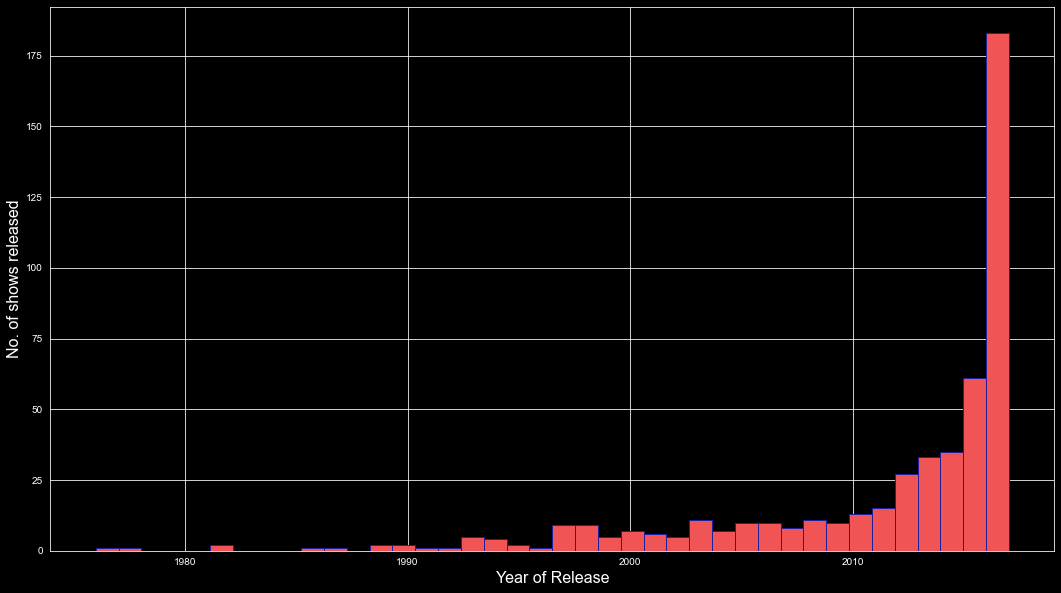

In [103]:
plt.figure(figsize=(18,10))
plt.hist(df['release year'], ec='#21209c', bins = 40, color='#f05454')
plt.xlabel('Year of Release', fontsize=16)

plt.ylabel('No. of shows released', fontsize=16)
plt.show()

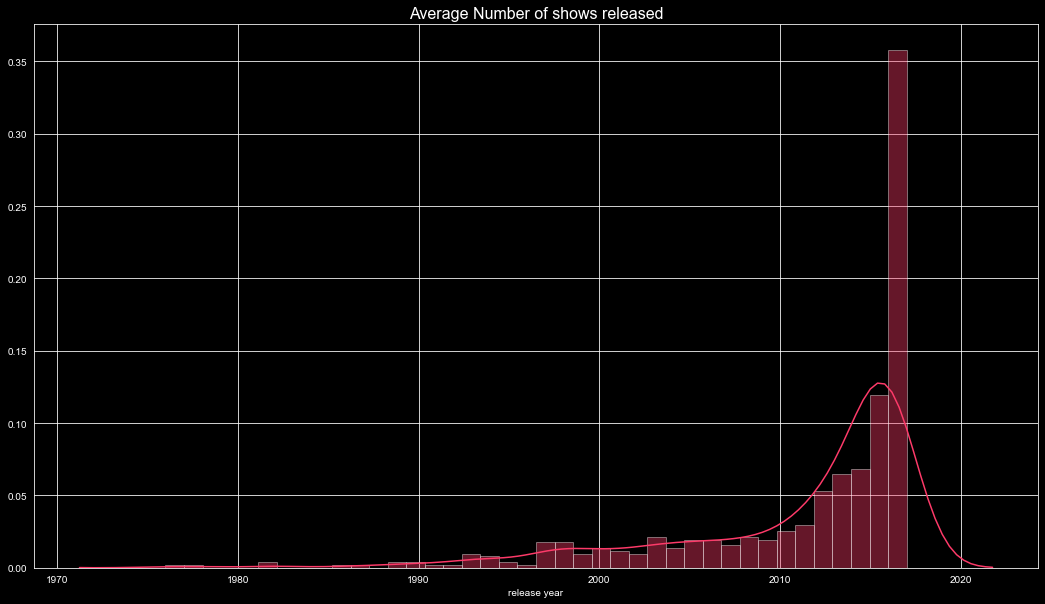

In [97]:
plt.figure(figsize=(18,10))
sns.distplot(df['release year'], bins=40, color='#fd3a69')
plt.title('Average Number of shows released', fontsize=16)
plt.show()

### How many Netflix shows are produced per rating?

In [98]:
freq = df['rating'].value_counts()
print(freq)

TV-14       106
TV-MA        82
PG           76
G            52
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64


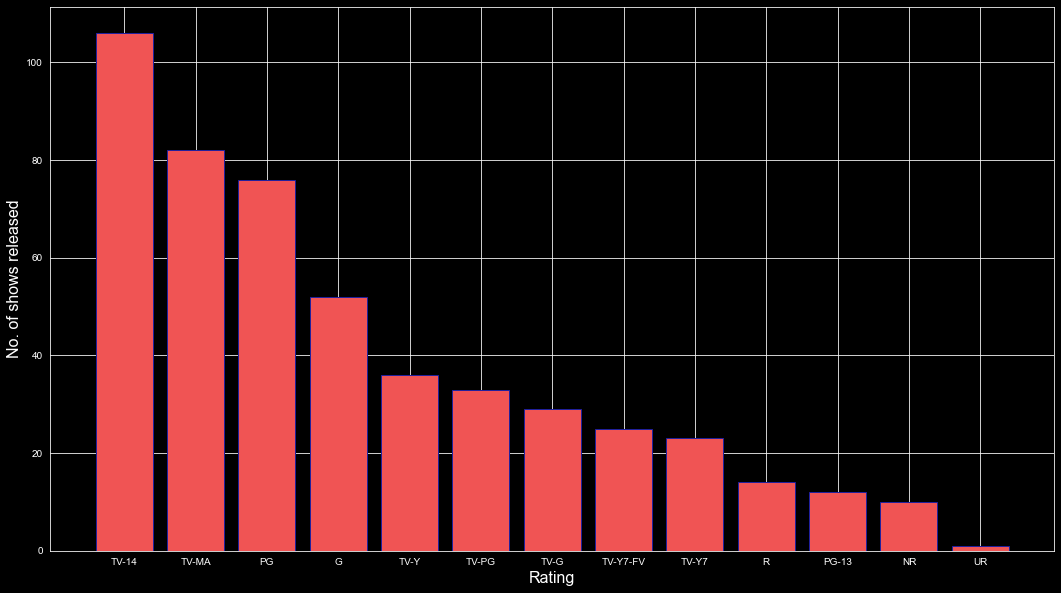

In [99]:
plt.figure(figsize=(18, 10))
plt.bar(freq.index, height = freq,ec='#21209c',color='#f05454')
plt.xlabel('Rating', fontsize=16)
plt.ylabel('No. of shows released', fontsize=16)
plt.show()

Text(0, 0.5, 'No. of shows released')

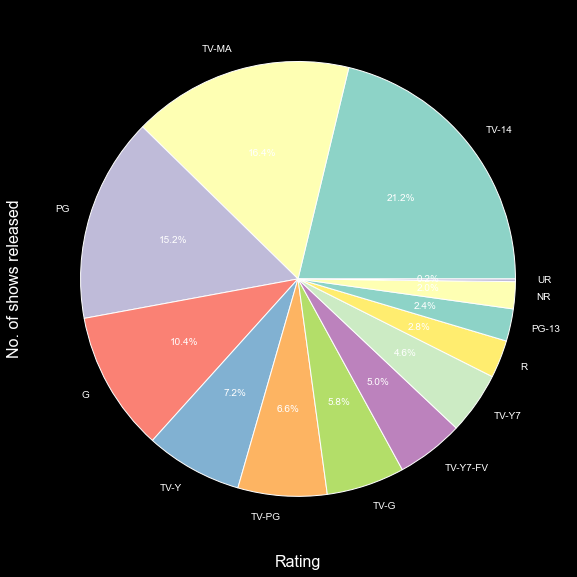

In [100]:
plt.figure(figsize=(18, 10))
freq.plot.pie(autopct="%.1f%%")
plt.xlabel('Rating', fontsize=16)
plt.ylabel('No. of shows released', fontsize=16)


## Shows based on Rating Description

### Number of shows released in the year VS Rating Description
 

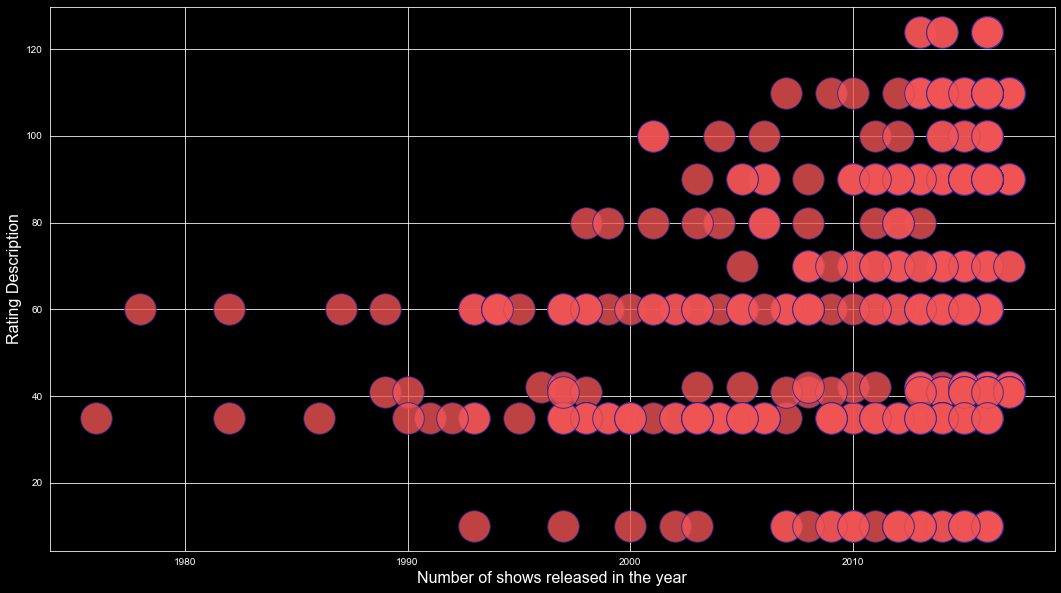

In [101]:
plt.figure(figsize=(18, 10))
X = pd.DataFrame(df, columns=['release year'])
y = pd.DataFrame(df, columns=['ratingDescription'])
plt.xlabel('Number of shows released in the year',fontsize=16)
plt.ylabel('Rating Description',fontsize=16)
plt.scatter(X, y, s=1000, alpha = 0.8,ec='#21209c',color='#f05454')
plt.show()


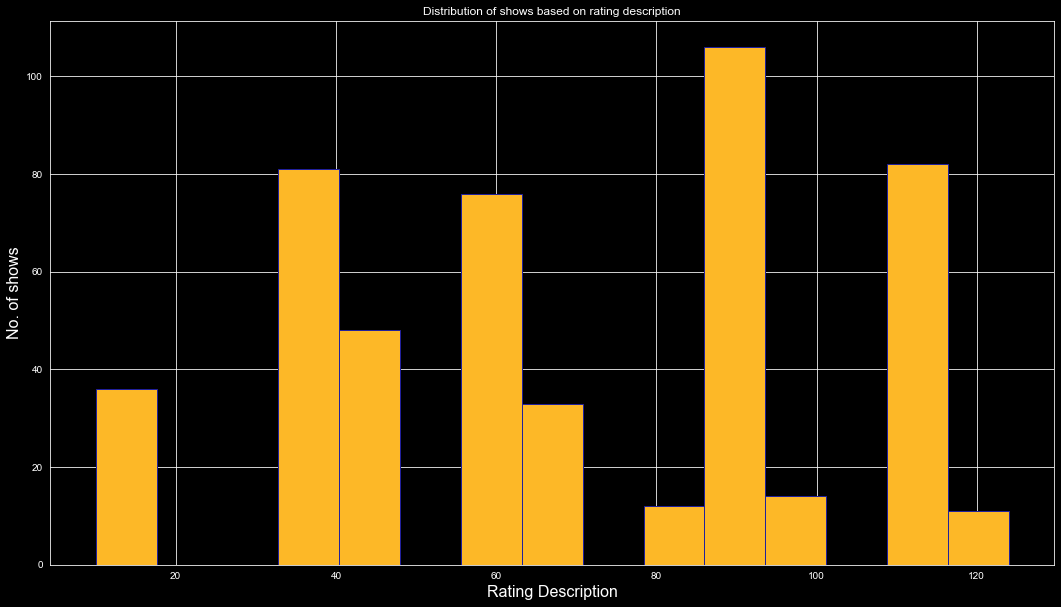

In [102]:

plt.figure(figsize=(18,10))
plt.hist(df['ratingDescription'], ec='#21209c', bins = 15, color='#fdb827')
plt.xlabel('Rating Description', fontsize=16)
plt.title('Distribution of shows based on rating description')


plt.ylabel('No. of shows', fontsize=16)
plt.show()